In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()

In [3]:
x = california.data
y = california.target

### 조건 : Functional API
1. training set / validation set / test set 분리! # 회귀 문제니까 다른 전처리가 필요하진 않을듯
2. hidden layer 최소 3 개 사용! (노드 수 자율)
3. early stopping 적용! (patience 7)
4. validation_data 옵션에 validation set 적용!

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = 2023)

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=2023)

In [6]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape

((13209, 8), (13209,), (3303, 8), (3303,), (4128, 8), (4128,))

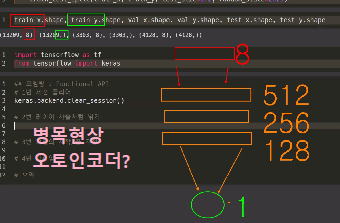

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
### Functional API
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 레이어 사슬처럼 엮기
il = keras.layers.Input(shape=(8,))
hl = keras.layers.Dense(512, activation='relu')(il)
hl = keras.layers.Dense(256, activation='relu')(hl)
hl = keras.layers.Dense(128, activation='relu')(hl)
ol = keras.layers.Dense(1)(hl)
# 3. 모델의 시작/끝 지정
model = keras.models.Model(il, ol)
# 4. 컴파일
model.compile(loss='mse', optimizer = 'adam')
# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 168,961
Trainable params: 168,961
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Early Stoopping 의 목적? 과적합 방지, 에폭스 ㅇㅇ 방지, 적절한 시점에 조절하는 것
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
es = EarlyStopping(monitor = 'val_loss', # 관측 대상
                   min_delta = 0,        # 관측 대상의 임계값 설정
                   patience = 5,         # 관측 대상의 성능이 증가하지 않을 때, 얼마나 더 지켜볼래
                   verbose=1,
                   restore_best_weights=True) # 최적 epoch 시점의 가중치로 설정할래

In [13]:
# 학습
model.fit(train_x, train_y, epochs=1000, verbose=1,
          callbacks=[es], validation_data=(val_x, val_y))

Epoch 1/1000
413/413 [==============================] - 3s 6ms/step - loss: 477.0798 - val_loss: 2.4570
Epoch 2/1000
413/413 [==============================] - 2s 5ms/step - loss: 4.5316 - val_loss: 35.5939
Epoch 3/1000
413/413 [==============================] - 2s 5ms/step - loss: 5.6539 - val_loss: 3.1017
Epoch 4/1000
413/413 [==============================] - 2s 6ms/step - loss: 12.8074 - val_loss: 2.3962
Epoch 5/1000
413/413 [==============================] - 2s 5ms/step - loss: 11.0227 - val_loss: 0.9590
Epoch 6/1000
413/413 [==============================] - 2s 5ms/step - loss: 5.7331 - val_loss: 2.0934
Epoch 7/1000
413/413 [==============================] - 2s 4ms/step - loss: 29.8535 - val_loss: 1.1912
Epoch 8/1000
413/413 [==============================] - 2s 5ms/step - loss: 1.0920 - val_loss: 0.8708
Epoch 9/1000
413/413 [==============================] - 2s 5ms/step - loss: 0.8174 - val_loss: 1.2666
Epoch 10/1000
413/413 [==============================] - 2s 4ms/step - loss:

In [14]:
# 예측값 생성
y_pred = model.predict(test_x)

129/129 [==============================] - 1s 3ms/step


In [15]:
y_pred[:10].reshape(-1)

array([1.5981748 , 2.3714473 , 1.6008157 , 0.83443576, 2.2955673 ,
       2.1395776 , 1.9255096 , 2.094488  , 1.4687017 , 2.35904   ],
      dtype=float32)

In [16]:
test_y[:10]

array([3.656, 2.01 , 2.132, 0.986, 1.53 , 1.326, 2.125, 3.068, 1.573,
       1.766])